<a href="https://colab.research.google.com/github/leilaneanjos/Analise_de_Sistemas_Lineares/blob/main/ASL1_Sinais_e_Sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise de Sistemas Lineares**

# 1 - Sinais e Sistemas 

Tendo conhecimento sobre o assunto de sinais e sistemas, sabemos que as função fundamentais como o degrau, impulso e exponencial são a base para a representação de outros sinais. Com o intuito de demonstrar essas funções aplicadas a linguagem Python veremos:

- Como determinar cada sinal; 
- Aplicações de operações úteis com sinais como deslocamento, escalonamento e inversão; 
- Como realizar a plotagem.


# Biblioteca
Para podermos realizar qualquer uma das aplicações pontuadas, primeiramente teremos que definir a biblioteca que será utilizada. No caso se fará uso da biblioteca `sympy`, sendo esta uma biblioteca para símbolos matemáticos. Uma fonte importante para aprender `sympy` é na sua [página de documentação](https://docs.sympy.org/latest/index.html).

In [14]:
import sympy as sp 

Após definirmos a biblioteca, precisamos agora determinar a váriavel que será utilizada no decorrer dos códigos, para isso faremos uso da função `sp.symbols()`.

In [15]:
t = sp.symbols('t', real=True)

Agora sim podemos determinar os sinais, vale ressaltar que a própria biblioteca `sympy` já tem por definida a função degrau e impulso unitário. Para degrau utilizase uma função da biblioteca chamada `sp.Heaviside()` já para o impulso unitário se faz uso da função `sp.DiracDelta()` .

# **Sinal Degral Unitário $u(t)$:** 

A biblioteca `sympy` já tem por definida o sinal degrau unitário sendo ele indentificado pela função `sp.Heaviside()` e simbolizado como $\theta (t)$.

In [16]:
u = sp.Heaviside(t)
u

Heaviside(t)

Para plotar o gráfico desse sinal aplicamos a função `sp.plot()`.

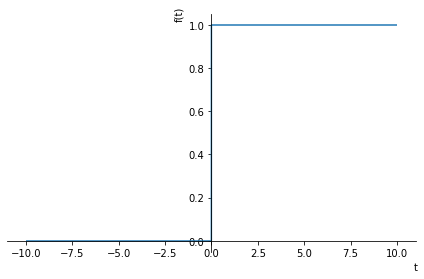

In [27]:
p = sp.plot(u)
p

Vale resaltar que dentro do argumento dessa função, após definirmos o sinal que desejamos fazer a plotagem, existe algumas configurações que podem ser úteis caso necessite realizar determinadas mudanças no gráfico, como por exemplo:
- `xlabel`: permite o programador nomear a coordenada x (abscissa);
- `ylabel`: permite o programador nomear a coordenada y (ordenada);
- `title` : permite o programador nomear um título para o seu gráfico;
- `xlim`  : permite o programador determinar os limites da função em x; 
- `size()`  : permite ao programador definir as dimensõe do grafico (largura, altura).

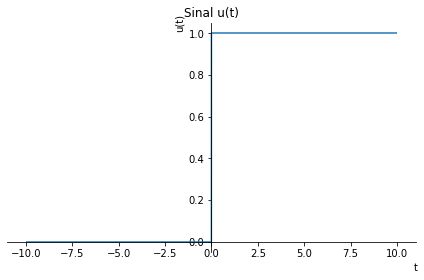

In [28]:
p = sp.plot(u, ylabel = 'u(t)', title = 'Sinal u(t)')
p

- Operações úteis:

Deslocamento temporal:

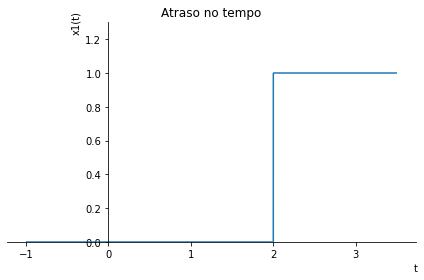

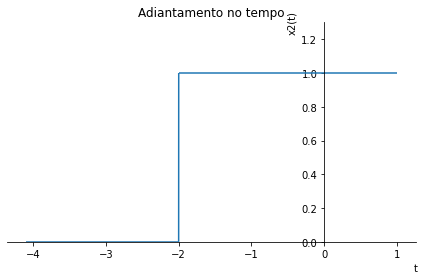

In [29]:
# Deslocamento para a direita (Atraso) 
x1= sp.Heaviside(t-2)
p1 = sp.plot(x1, (t, -1, 3.5), title = 'Atraso no tempo', ylim=(0, 1.3), ylabel= 'x1(t)')
p1

# Deslocamento para a esquerda (Adiantado) 
x2= sp.Heaviside(t+2)
p2= sp.plot(x2, (t, -4.1, 1), title ='Adiantamento no tempo', ylim=(0, 1.3), ylabel='x2(t)')
p2

Escalamento temporal:

Tomamos como exemplo o sinal:
$$ x{\tiny 1} (t) = 2u(t)-u(t-1)-2u(t-2)+u(t-3)$$

Definindo o sinal e plotando o gráfico em `sympy`, temos:



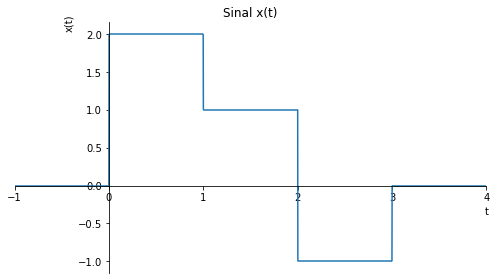

In [30]:
x1= 2*sp.Heaviside(t)-sp.Heaviside(t-1)-2*sp.Heaviside(t-2)+sp.Heaviside(t-3)
p1 = sp.plot(x1,xlabel = 't', ylabel = 'x(t)', title = 'Sinal x(t)', xlim = (-1, 4), size = (7, 4))
p1

Se faz necessário que neste sinal ocorra um deslocamento a direita de 1 segundo e uma compressão de fator 2 ,ou seja, $x{\tiny 2}(2t-1)$. Para resolver esse problema se faz uso de artifíos matemáticos básicos. Mas como desejamos fazer com que o computador faça todo o trabalho e no final só nos entregue o resultado que desejamos, podemos utilizar das muitas ferramentas que a biblioteca `sympy` nos fornece.
No caso a ferramenta a ser utiliza é o `lambda`, tendo ela como objetivo criar funções.

Para melhor entendimento vamos fazer a seguinte analíse. Quando não utilizamos o `lambda`, $x{\tiny 2}$ é só um comando de atribuição, mas quando adicionamos o `lambda`na expressão, $x{\tiny 2}$ passa a ser uma função que recebe valor.No caso o valor que  $x{\tiny 2}$ vai receber é $ 2t-1$.


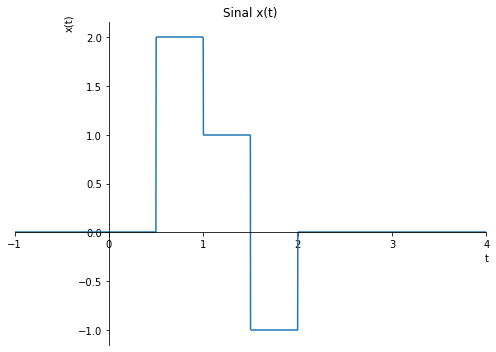

In [31]:
x2 = lambda t: 2*sp.Heaviside(t)-sp.Heaviside(t-1)-2*sp.Heaviside(t-2)+sp.Heaviside(t-3)
p1 = sp.plot(x2(2*t-1),xlabel = 't', ylabel = 'x(t)', title = 'Sinal x(t)', xlim = (-1, 4), size = (7, 5))
p1

Reversão temporal:
Quando se faz necessário somente reverter a função

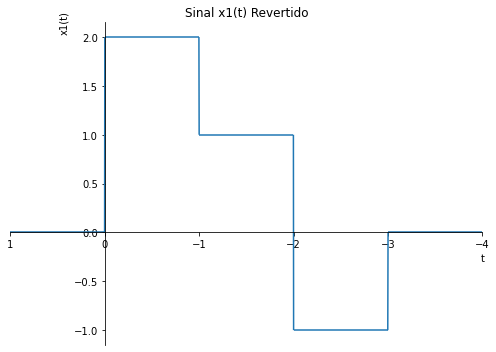

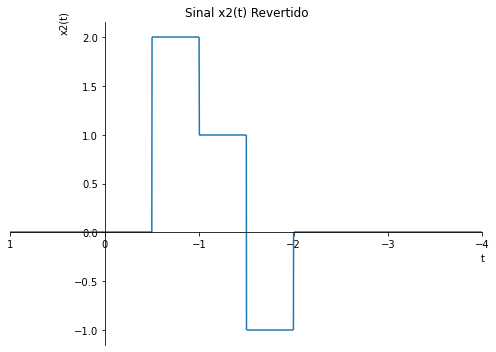

In [32]:
p1 = sp.plot(x2(-t),xlabel = 't', ylabel = 'x1(t)', title = 'Sinal x1(t) Revertido', xlim =(1, -4),size = (7, 5))
p1

p2 = sp.plot(x2(-2*t-1),xlabel = 't', ylabel = 'x2(t)', title = 'Sinal x2(t) Revertido', xlim = (1, -4), size = (7, 5))
p2

# **Sinal impulso unitário $\delta(t)$:**

Para o impulso unitário a biblioteca também já tem uma função definida denominada de `sp.DiracDelta()`:

In [11]:
d = sp.DiracDelta(t)
d

DiracDelta(t)

Neste caso o gráfico de um impulso unitário pode não ser tão útil de se fazer uma vez que ele será representado por uma reta no instante zero tendendo ao infinito. Mas podemos aplicar as propriedades do impulso.

- **Propriedade da amostragem da função Impulso unitário:**

Exemplo 01:

Tendo o impulso unitário: $$ \delta(1-t)$$

E a função: $$ t^2+4$$

Exemplo 02:

Tendo o impulso unitário: $$ \delta(t)$$

E a função: $$ e^{-3jt}$$

Para a propriedade da amostragem temos que:
- Definir o impulso unitário
- Definir a função;
- Utilizar a função `sp.integrate` da biblioteca `sympy` para realizar a propriedade.


In [33]:
#exemplo 01
im = sp.DiracDelta(1-t)
f = t**3+4
R = sp.integrate(f*im, (t, -sp.oo, sp.oo))
R

5

In [34]:
#exemplo 02
from sympy import*
j = I
im = sp.DiracDelta(t)
f = sp.exp(-3*j*t)
R = sp.integrate(f*im, (t, -sp.oo, sp.oo))
R

1

No exemplo 02, temos como função uma exponencial complexa, a biblioteca `sympy` tem por definida a representação da parte imaginaria como `I`, mas para termos de estudo ela foi denomidada com `j`   

- **Impulso unitário como função generalizada:** 

Vamos cálcular $ \frac{dx}{dt}$ do sinal $x(t) = -1[u(t+4)-u(t)]+1[u(t)-u(t-2)]$

Para isso precisamos: 
- Definir o sinal $x(t)$ em `sympy`
- Derivar usando a função `diff()`
- Guarda o resultado em $x'(t)$

In [35]:
x = (-sp.Heaviside(t+4)+sp.Heaviside(t))+(sp.Heaviside(t)-sp.Heaviside(t-2))
x

2*Heaviside(t) - Heaviside(t - 2) - Heaviside(t + 4)

In [36]:
xl = x.diff(t)
xl

2*DiracDelta(t) - DiracDelta(t - 2) - DiracDelta(t + 4)

Segundo essa propriedade a derivada de um $u(t)$ é um  $\delta(t) $. Por analogia então a integral de um $\delta(t)$ é um $u(t)$ 

In [37]:
xi= sp.integrate(xl)
xi

2*Heaviside(t) - Heaviside(t - 2) - Heaviside(t + 4)

# **Sinal exponencial  $e^{st}$:**

É definida pela função `sp.exp()`:

Dada a função exponencial $e^{st}$, sendo $s$ geralmente um número complexo 
$$ s = a +jb$$
 Vamos densenvolver os códigos para as seguintes situações:
 
 Para $s \in$ aos $\mathbb{R}$
 - a > 0 e b = 0
 - a < 0 e b = 0
 - a = 0 e b = 0

Para $s \in$ aos $\mathbb{C}$   
 - a > 0 e b $\neq$ 0
 - a < 0 e b $\neq$ 0
 - a = 0 e b $\neq$ 0

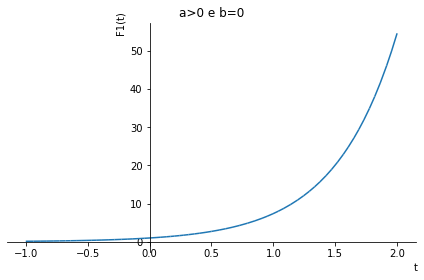

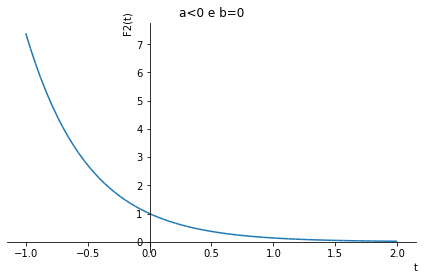

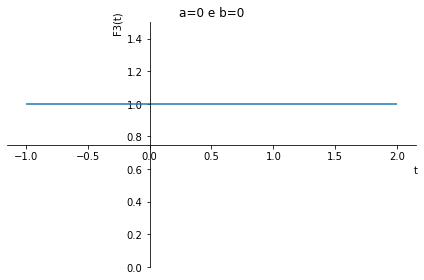

In [38]:
## Para s pertencente aos reais ##
# a>0 e b=0
s = 2+j*0
F1 = sp.exp(s*t)
p1 = sp.plot(F1, (t, -1, 2),ylabel='F1(t)', title = 'a>0 e b=0')

# a<0 e b = 0
s = -2+j*0
F2 = sp.exp(s*t)
p2 = sp.plot(F2, (t, -1, 2),ylabel='F2(t)', title = 'a<0 e b=0')

# a=0 e b =0 
s = 0+j*0
F3 = sp.exp(s*t)
p3 = sp.plot(F3,(t, -1, 2), ylim=(0,1.5), ylabel='F3(t)', xlabel='t', title ='a=0 e b=0' )

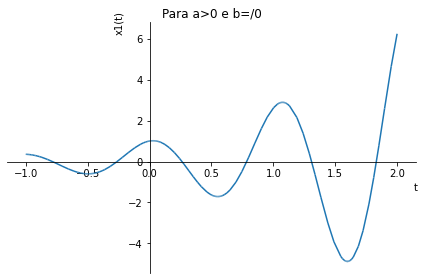

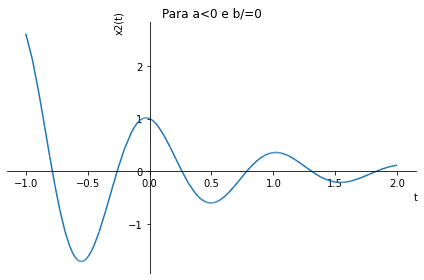

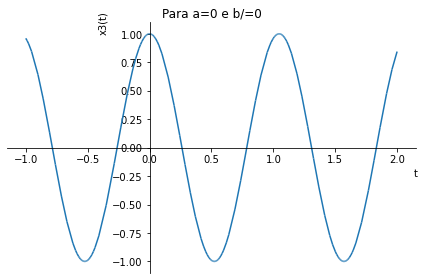

In [39]:
## Para s pertecente aos numeros complexos ##
#  a > 0 b /= 0
s = 1+j*6
sc = 1-j*6
x1 = (sp.exp(s*t)+sp.exp(sc*t))/2 
x1 = sp.plot(x1, (t, -1, 2), title='Para a>0 e b=/0', ylabel='x1(t)')

#  a < 0 b /= 0
s1 = -1+j*6
sc1 = -1-j*6
x2 = (sp.exp(s1*t)+sp.exp(sc1*t))/2 
x2 = sp.plot(x2, (t, -1, 2), title='Para a<0 e b/=0', ylabel='x2(t)')

#  a = 0 b /= 0
s2 = 0+j*6
sc2 = 0-j*6
x3 = (sp.exp(s2*t)+sp.exp(sc2*t))/2 
x3 = sp.plot(x3, (t, -1, 2), title='Para a=0 e b/=0', ylabel='x3(t)')
